# Diabetes Predictor using Machine Learning

by: Robin Gdoinho


Main Objectives:


*   Scale the data
*   Apply feature selection (Correlation and Feature Selection)
*   Build a reilable predictive model to determine if a person has diabetes


Context:

Diabetes is a common and serious health issue that impacts millions of people globally, presenting significant medical, social, and economic challenges. Detecting diabetes early and taking action is important for improving patient outcomes and quality of life for those at risk. In data science, predictive models play an important role in helping identify people who have a higher chance of developing diabetes by analyzing key health indicators.

For this assignment, the Pima Indians Diabetes Dataset will be used. This dataset consists of medical records from adult women of Pima Indian heritage and includes important features like **glucose levels**, **body mass index (BMI)**, **age**, and more. These characteristics make the dataset useful for practicing feature engineering methods such as scaling and feature selection. Although the dataset focuses on a specific group and would need to be broadened for wider practical applications, it provides a useful starting point for understanding the basics of predictive modeling in healthcare.





# 1. Data loading

For this project we will be using the [Prima Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) that can be found
on the Kaggle website.


We can start by loading the data into our pandas dataframe, and perform some basic analysis to ensure that the data has been loaded correctly.

Note: Loading data from an external source often requires that you refer back to the source to have a better understanding of its origin and clear any possible misconception.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd
import numpy as np

# read the csv file into your notebook
df = pd.read_csv('diabetes.csv', encoding='latin-1')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Analysis

Examining the dataset provides an opportunity to gain preliminary insights into the variables and their potential impact on the prediction of diabetes. The dataset is composed entirely of adult female subjects, and the following attributes are included:

- **Pregnancies**: The number of pregnancies experienced by the individual. Given the demographic composition of the dataset, this feature may correlate with the likelihood of diabetes onset.  
- **Glucose**: Plasma glucose concentration measured 2 hours after an oral glucose tolerance test.  
- **BloodPressure**: Diastolic blood pressure (mm Hg), reflecting cardiovascular health.  
- **SkinThickness**: Triceps skinfold thickness (mm), a proxy for subcutaneous fat and body composition.  
- **Insulin**: Serum insulin concentration (μU/ml) measured 2 hours post-glucose load, indicative of pancreatic beta-cell function and insulin resistance.  
- **BMI**: Body mass index, calculated as weight (kg) divided by height squared (m²).  
- **DiabetesPedigreeFunction**: A calculated metric estimating the genetic predisposition to diabetes based on family history.  
- **Age**: The chronological age of the subject in years.  
- **Outcome**: A binary response variable (0 = no diabetes, 1 = diabetes), which serves as the dependent variable and target for predictive modeling.  

Given that the outcome variable is binary, logistic regression represents an appropriate baseline model for this dataset. Logistic regression is well-suited for estimating the probability of categorical outcomes and is particularly effective when working with numerical predictors.


## 2. Preprocessing

In [3]:
# Check for missing values
display (df.isnull().sum())

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


The dataset appear to have no missing values, so there is not need to account for NaN is the data. It is safe to move to the next step of the preprocessing.

## Feature Selection

To improve model effectiveness, feature selection is applied to identify the **most relevant predictors of diabetes**. By analyzing correlations between features and the outcome variable, we can prioritize health measurements that provide the strongest signals while reducing redundancy.  

We also apply a variance threshold to remove features with little to no variation, as they contribute minimal value in distinguishing patients with and without diabetes. These steps streamline the dataset, reduce noise, and strengthen the foundation for predictive modeling.  

### Correlation  
We examine the correlation of each feature with the outcome variable using the `.corr()` method in pandas. Absolute correlation values help rank features by importance, and features with very low correlation can be excluded since they are unlikely to improve predictions.


In [4]:
import numpy as np

# Calculate the correlation between each feature and the target
correlation = df.corr()['Outcome'].abs().sort_values(ascending=False)

# Display the correlation values
display(correlation)

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


## Key Findings

Based on the sorted correlation values, we can draw the following conclusions:

- **Glucose** has the highest correlation with *Outcome* at **0.466581**. This suggests that glucose levels are the most strongly related feature to the outcome, indicating that higher glucose values are associated with a greater chance of the outcome occurring. This makes sense from a medical perspective, as glucose is a key indicator related to the condition.  

- **BMI** and **Age** also show a moderate correlation of **0.292695** and **0.238356**, respectively. This implies that Body Mass Index and Age are also significant factors influencing the outcome.  

- **Pregnancies** has a correlation of **0.221898**, which is a similar moderate strength to BMI and Age. This feature is also a relevant predictor.  

- Features like **Insulin**, **SkinThickness**, and **BloodPressure** have very low correlation values, suggesting a weak linear relationship with the *Outcome* variable. Therefore, we can drop these two features from our predictive model.



In [5]:
# Filter the DataFrame to keep only features with an absolute correlation greater than 0.1
# The .index.tolist() part extracts the names of the selected features as a list
df_filtered = df[correlation[correlation > 0.1].index.tolist()]

# Display the new filtered DataFrame
display(df_filtered)

,Outcome,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin
0,1,148,33.6,50,6,0.627,0
1,0,85,26.6,31,1,0.351,0
2,1,183,23.3,32,8,0.672,0
3,0,89,28.1,21,1,0.167,94
4,1,137,43.1,33,0,2.288,168
...,...,...,...,...,...,...,...
763,0,101,32.9,63,10,0.171,180
764,0,122,36.8,27,2,0.340,0
765,0,121,26.2,30,5,0.245,112
766,1,126,30.1,47,1,0.349,0


**Variance**

Another important step is checking for low variance. Features with low variance don't change much, providing little useful information. We'll use the **VarianceThreshold** module from scikit-learn to automatically remove these features.

Before we apply the function, we must separate the target variable from our features. This ensures the function doesn't accidentally remove our target, which is essential for the prediction.

In [6]:
# Import variance threshold from sklearn
from sklearn.feature_selection import VarianceThreshold

# Split the data into features and target
X = df_filtered.drop('Outcome', axis=1)
Y = df_filtered['Outcome']

# Create the VarianceThreshold object. Any feature with less than a 0.01 variance will be removed
selector = VarianceThreshold(threshold=0.01)

# Fit the object to the data
selector.fit(X)

# Transform the data
X_var = selector.transform(X)

# Create a DataFrame with the selected features
X_filtered = pd.DataFrame(X_var, columns=X.columns[selector.get_support()])

# Inspect the features that were kept
display(X_filtered)

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin
0,148.0,33.6,50.0,6.0,0.627,0.0
1,85.0,26.6,31.0,1.0,0.351,0.0
2,183.0,23.3,32.0,8.0,0.672,0.0
3,89.0,28.1,21.0,1.0,0.167,94.0
4,137.0,43.1,33.0,0.0,2.288,168.0
...,...,...,...,...,...,...
763,101.0,32.9,63.0,10.0,0.171,180.0
764,122.0,36.8,27.0,2.0,0.340,0.0
765,121.0,26.2,30.0,5.0,0.245,112.0
766,126.0,30.1,47.0,1.0,0.349,0.0


**Results of Variance Thresholding**

Our application of the VarianceThreshold function did not remove any features. This result tells us that all the remaining features in our dataset have a variance greater than our 0.01 threshold.

Note: For a small dataset like this one, increasing the threshold further could be risky, as it might inadvertently remove valuable information that is crucial for building an accurate predictive model.

We can now move on from the preprocessing stage.

# 3. Graphing

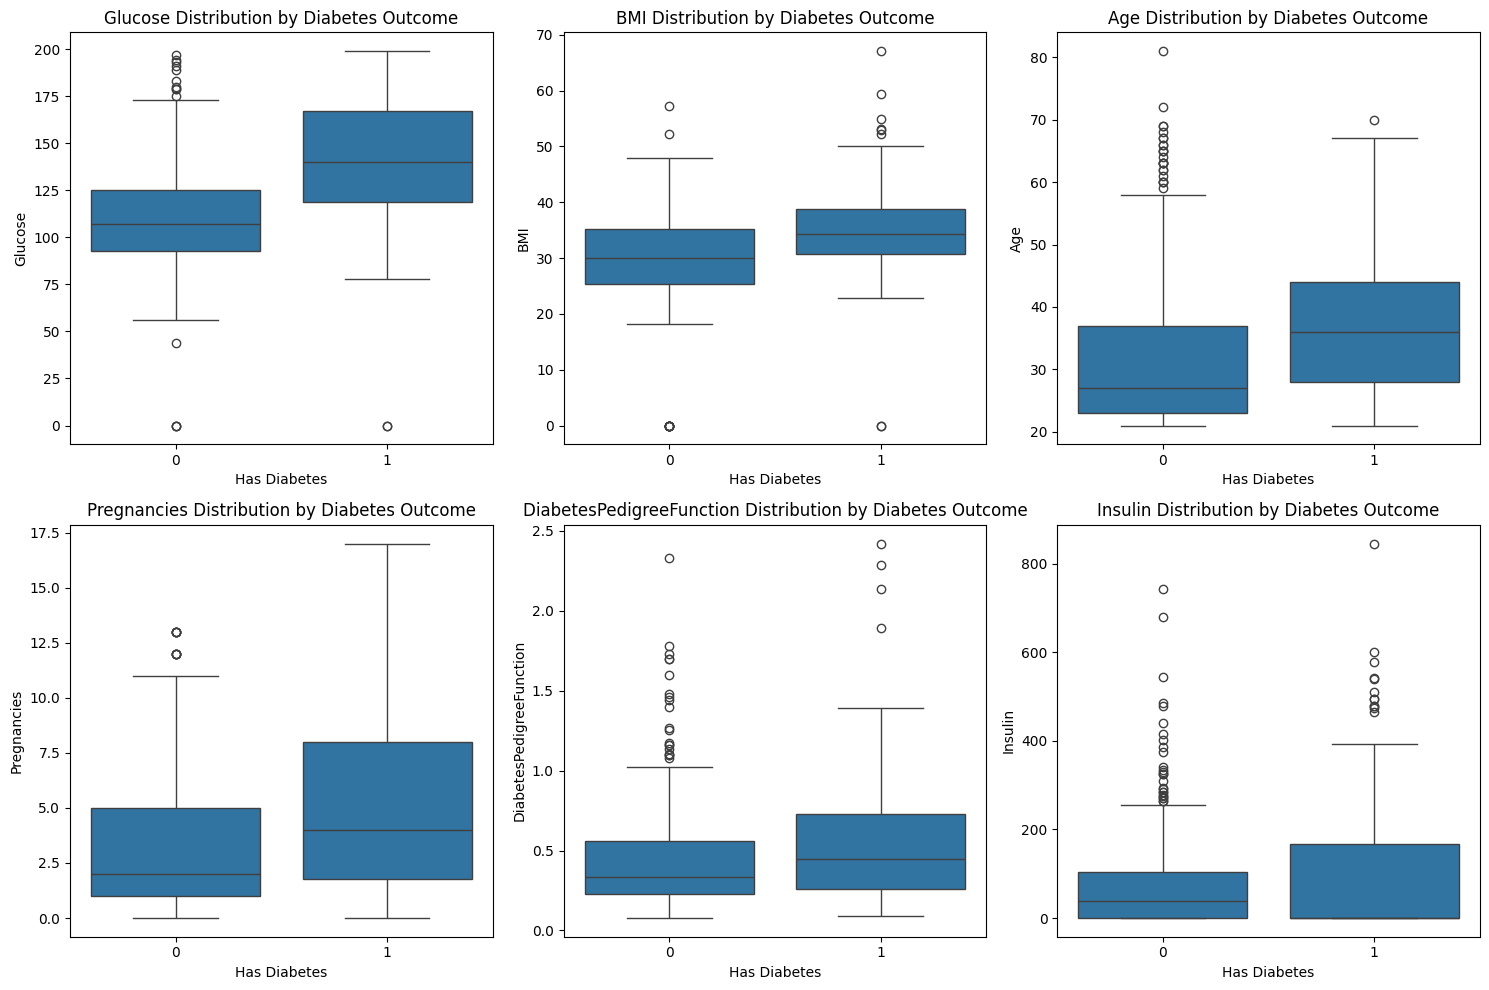

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

# Assuming 'df' is your initial DataFrame loaded previously.
# If not, you'd need to load it, e.g., df = pd.read_csv('your_data.csv')

# --- 1. Correlation-Based Feature Selection ---
# Calculate the absolute correlation between each feature and the 'Outcome'
correlation = df.corr()['Outcome'].abs().sort_values(ascending=False)

# Filter the DataFrame to keep only features with an absolute correlation > 0.1
# This selects features with a meaningful linear relationship to the target.
df_filtered = df[correlation[correlation > 0.1].index.tolist()]

# --- 2. Variance-Based Feature Selection ---
# Split the data into features (X) and target (y)
X = df_filtered.drop('Outcome', axis=1)
y = df_filtered['Outcome']

# Create a VarianceThreshold object to remove features with a variance less than 0.01
selector = VarianceThreshold(threshold=0.01)

# Fit the selector to the features and transform the data
selector.fit(X)
X_var = selector.transform(X)

# Create a new DataFrame with the features that were kept
X_filtered = pd.DataFrame(X_var, columns=X.columns[selector.get_support()])

# --- 3. Visualization ---
# Set the figure size for better visibility
plt.figure(figsize=(15, 10))

# Loop through the filtered features and create boxplots
for i, feature in enumerate(X_filtered.columns, 1):
    plt.subplot(2, 3, i)

    # Create a boxplot to visualize the distribution of each feature
    # across the two outcome groups (0 and 1)
    sns.boxplot(x=y, y=X_filtered[feature])
    plt.title(f'{feature} Distribution by Diabetes Outcome')
    plt.xlabel('Has Diabetes')
    plt.ylabel(feature)

# Adjust the layout to prevent plot titles and labels from overlapping
plt.tight_layout()
plt.show()


Here we can see some key trends in the health measurements of the patients, based on whether or not they have diabetes:

- **Glucose:** Individuals with diabetes tend to have higher glucose levels overall, with a clear upward shift in their distribution compared to those without diabetes.

- **BMI and Age:** Both BMI and age are generally higher for patients with diabetes, suggesting that these factors are associated with greater risk.

- **Pregnancies:** The number of pregnancies is higher on average among those with diabetes, although there is substantial overlap between the groups.

- **Diabetes Pedigree Function:** This feature also trends higher in the diabetes group, indicating that a stronger family history of diabetes may be linked to a greater likelihood of having the disease.

- **Insulin:** Insulin values vary widely, but the distribution is noticeably shifted upward for patients with diabetes, though there are some outliers in both groups.

While there is some overlap in the distributions for each feature, these plots suggest that measurements like glucose, BMI, and age provide useful signals for distinguishing between patients with and without diabetes. This is in line with what we previously figured out through the correlations in the data. Keeping these trends in mind, we can proceed to the next step of doing the train_test split.

# 4. Train Test Split


Now that our data is preprocessed and we have a sufficient idea of the trends of or data, we can split the data into training and testing data. Specifically in a manner so that 80% of the data goes to the training set, and 20% to the testing set. We do this so that our predictive model has plenty of data to work with. This is also done so that we have some data to test the efficiency of our model with, and so that the model doesn't learn from the testing data as well.

This can be done through the train_test_split function in Sklearn. Take advantage of your libraries.

In [11]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=64)

# 5. Scaling the Data

After splitting the data into training and testing sets, data scaling can be performed. This crucial step is done after the split to prevent data leakage, a condition where information from the test set influences the training process. For instance, if the mean and standard deviation for scaling were calculated using the entire dataset, the model would be exposed to test set information during training, compromising the evaluation of its performance.

Scaling is vital for many machine learning algorithms that are sensitive to the magnitude of feature values. By standardizing variables to have a mean of zero and a standard deviation of one, all features are put on an even playing field. This prevents features with larger values from dominating the learning process. A scaler from scikit-learn will be used, fitted only on the training data, and then the same transformation will be applied to both the training and testing sets to ensure there is no information leakage.

In [12]:
# Import the standard scaler from sklearn
from sklearn.preprocessing import StandardScaler

# Create an instance of the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and validation sets
X_train_final = scaler.fit_transform(X_train)
X_test_final = scaler.transform(X_test)

With this, our values have been scaled so that there is no bias towards larger values in the dataset. This ensures that the data is normalized the data, ensure a **mean** of 0, and a **STD (standard deviation)** of 1.



# 6. Buidling the Model

A suitable predictive model for this dataset is **logistic regression**. This model is well-suited for the task because it is simple, easily interpretable, and provides various metrics for evaluating its performance. It is particularly ideal for a binary target, such as predicting the presence or absence of a condition.

To begin, the *LogisticRegression* module from scikit-learn must be imported. The model is then "fit" or trained on the prepared data. This process demonstrates the benefit of leveraging libraries, as they handle the complex computational work, allowing for an efficient workflow.


In [13]:
# Import the LogisticRegression module
from sklearn.linear_model import LogisticRegression

# Create the model. High max_iter makes sure we give it enough time to converge.
# We'll use the same random states from our previous train_test_split.
model = LogisticRegression(max_iter=1000, random_state=64)

# Fit the model on the training data.
model.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000, random_state=64)


Something important to note is the **max_iter** parameter when creating the model. This is just the number of times the model will update the weights to find out which features to prioritize in predicting.

Having a high number, such as 1000, means it will check and update the weights 1000, but will have likely settled on an ideal weighting before iteration 1000.

With that out of the way, the model has been built, and trained.

# 7. Evaluating the Model

The model has been successfully built and trained to predict a diabetes diagnosis within this specific group. While this is a targeted application, the techniques used are highly scalable. Should more extensive data become available, these same principles can be applied to build a robust model for a much larger population.

Now we can begin importing some metrics of success from Sklearn and then see how well the model did in predicting the testing data.


In [14]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the validation set, and store it in a variable.
y_pred = model.predict(X_test_final)

# Check the accuracy of our predictions
print("Validation Accuracy:", accuracy_score(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print the classification report for more details
print(classification_report(y_test, y_pred))

Validation Accuracy: 0.7987012987012987
Confusion Matrix:
 [[92 13]
 [18 31]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.70      0.63      0.67        49

    accuracy                           0.80       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154



# Confusion Matrix Analysis


The confusion matrix effectively breaks down the model's predictions for a diabetes diagnosis.  Each row represents the actual class (0 for non-diabetic and 1 for diabetic), while each column shows the predicted class.

- **True Negatives (Top-Left)**: The value of 92 indicates the number of non-diabetic patients who were correctly classified as not having diabetes.

- **True Positives (Bottom-Right)**: The value of 31 shows the number of diabetic patients who were correctly identified by the model.

The off-diagonal values represent the model's errors:

- **False Positives (Top-Right)**: The value of 13 means 13 non-diabetic patients were incorrectly classified as having diabetes. These are also known as Type I errors.

- **False Negatives (Bottom-Left)**: The value of 18 shows that 18 diabetic patients were missed by the model and incorrectly classified as non-diabetic. These are also known as Type II errors.

Overall, the matrix reveals that the model is more effective at correctly identifying non-diabetic patients, with a higher number of errors occurring when predicting positive cases.

# Classification Report


Classification Report
Precision, recall, and F1-score give us more insight into how well the model handles each class:

- **Precision:** For class 0 (no diabetes), precision is strong at 0.84, meaning that when the model predicts a patient does not have diabetes, it is usually correct. For class 1 (has diabetes), precision drops to 0.70, indicating some false positives, meaning that patients predicted to have diabetes who actually do not.

- **Recall:** The recall for class 0 is 0.88, showing the model successfully catches most non-diabetic patients. For class 1, recall is lower at 0.63, reflecting that the model misses a notable portion of actual diabetes cases.

- **F1-score:** The F1-scores, which balance precision and recall, are 0.86 for non-diabetic and 0.67 for diabetic patients, pointing to a stronger performance for identifying non-diabetic individuals.

The macro and weighted averages for all metrics hover around 0.75-0.80, suggesting a moderate ability to distinguish between the two groups, but with room for improvement, especially in detecting diabetic cases.

# Final Report Analysis


Overall Accuracy: The model achieved an accuracy of 0.80, meaning it correctly classified 80% patients in the validation set.

- Class 0 (No Diabetes): The model is more reliable for patients without diabetes, with both precision and recall above 0.80, resulting in a strong F1-score of 0.86.

- Class 1 (Has Diabetes): Precision and recall are lower for diabetic patients, indicating the model is more likely to miss true positives or incorrectly label non-diabetic patients as diabetic.

Support: The number of samples in each class is imbalanced (105 without diabetes, 49 with diabetes), which may contribute to the model's better performance on non-diabetic patients.

Overall, this project demonstrated how basic feature selection and scaling can be used to build a predictive model for diabetes diagnosis using health measurements specifically from the Pima Indians dataset. Through visual exploration and systematic feature selection, we identified key trends in the data and streamlined the set of predictors before training our model. While our logistic regression model achieved an overall accuracy of 80%, it performed noticeably better at identifying patients without diabetes than those with the condition. This is a reminder of the challenges that come with imbalanced datasets and the importance of choosing evaluation metrics carefully.

Accuracy alone would have suggested this is a wonderful model, but recall shows that we still have plenty of room to improve. However, going through with processing the data provides us with invaluable skills and understanding of concepts of how to build models for other projects.

Overall, this workflow provides a strong foundation for predictive modeling in healthcare, and highlights the practical steps and considerations needed to turn raw data into actionable insights.